In [17]:
from camera_calibration import CameraCalibrator

In [2]:
calibrator = CameraCalibrator()

In [3]:
calibrator.load()

In [17]:
calibrator.cameraMatrix

array([[  1.15396093e+03,   0.00000000e+00,   6.69705357e+02],
       [  0.00000000e+00,   1.14802496e+03,   3.85656234e+02],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00]])

In [18]:
calibrator.distortionCoefficient

array([[ -2.41017956e-01,  -5.30721173e-02,  -1.15810355e-03,
         -1.28318856e-04,   2.67125290e-02]])

In [19]:
import glob

In [57]:
c2 = CameraCalibrator()

In [58]:
c2.load()

In [59]:
c2.cameraMatrix

array([[  1.15396093e+03,   0.00000000e+00,   6.69705357e+02],
       [  0.00000000e+00,   1.14802496e+03,   3.85656234e+02],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00]])

In [60]:
c2.distortionCoefficient

array([[ -2.41017956e-01,  -5.30721173e-02,  -1.15810355e-03,
         -1.28318856e-04,   2.67125290e-02]])

In [19]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

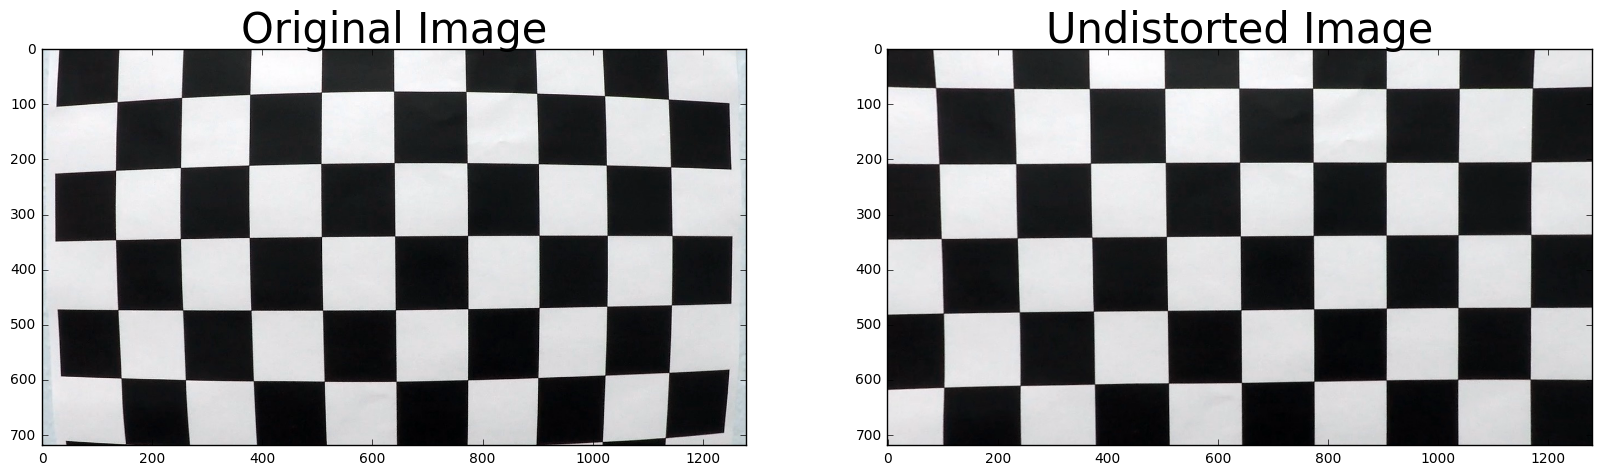

In [20]:
fspath = 'camera_cal/calibration1.jpg'
c = calibrator
img = cv2.imread(fspath)
dst = cv2.undistort(img, c.cameraMatrix, c.distortionCoefficient, None, c.cameraMatrix)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

In [21]:
nx, ny = 9, 5

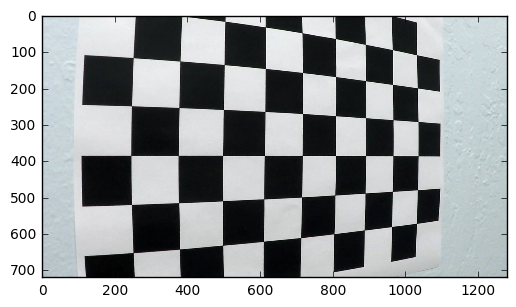

In [22]:
fspath = 'camera_cal/calibration5.jpg'
img = cv2.imread(fspath)
plt.imshow(img)

corners not found


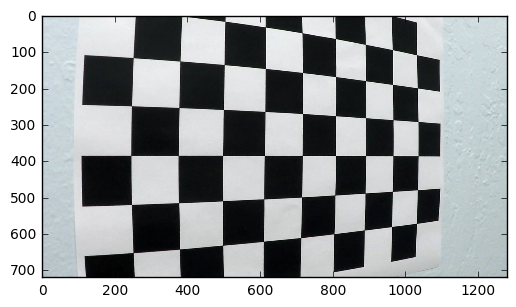

In [23]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
if ret:
    cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
#     cv2.imshow('img', img)
    pass
else:
    print("corners not found")
plt.imshow(img)

In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from camera_calibration import CameraCalibrator
calibrator = CameraCalibrator()
calibrator.load()

In [3]:
calibrator

In [4]:
from image import Image
from image_processor import ImageProcessor
import config
processor = ImageProcessor(calibrator, config)

In [5]:
img = Image(fname='./test_images/test2.jpg')
processor.transform(img, debug=True)
print(img._stages)

['original', 'undistorted', 'sobelxBinary', 'sChannelBinary', 'combinedBinary']


In [8]:
img.imageForStage('undistorted').shape

(720, 1280, 3)

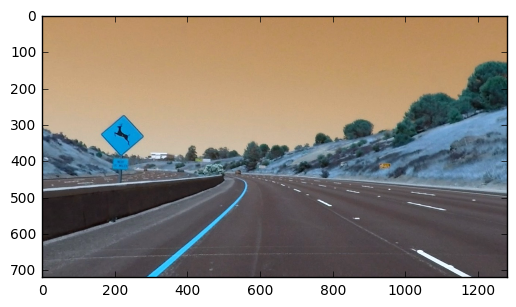

In [7]:
plt.imshow(img.imageForStage('undistorted'), cmap='gray')

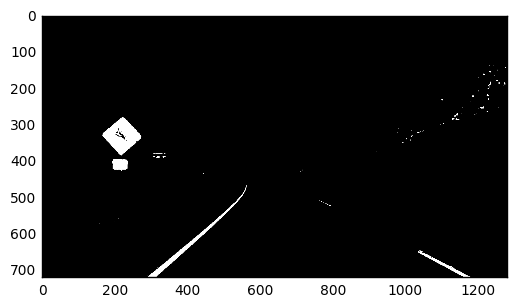

In [16]:
plt.imshow(img.imageForStage('sChannelBinary'), cmap='gray')

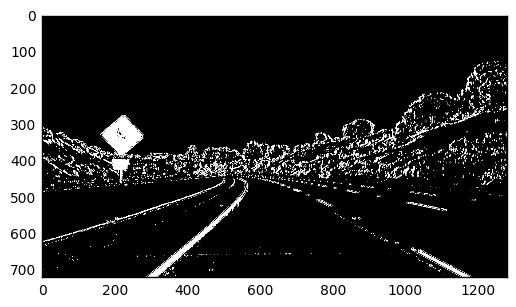

In [17]:
plt.imshow(img.imageForStage('combinedBinary'), cmap='gray')

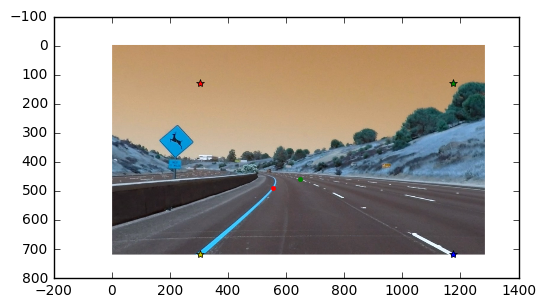

In [72]:
import numpy as np

line_len = lambda p1, p2: np.sqrt((p2[0]-p1[0])**2 + (p2[1]-p1[1])**2)

src = np.float32([
#     [420, 618],
#     [969, 618],
#     [1176, 717],
#     [303, 717]

#     [561, 460.5],
#     [558.0, 483.0],
    [553.5, 490.5],
#     [535.5, 508.5],
#     [528.0, 516.0],
#     [514.5, 532.5],
#     [505.5, 538.5],
#     [490.5, 553.5],
    [648, 457.5],
    [1176, 717],
    [303, 717]
])

# l1 = line_len(src[0], src[3])
l2 = line_len(src[1], src[2])

rect_width = src[2][0] - src[3][0]
top_right = [src[2][0], src[2][1] - l2]
# print(l1, l2)
dst = np.float32([
#     [src[3][0], src[3][1] - l1],
    [top_right[0] - rect_width, top_right[1]],
    top_right,
    src[2],
    src[3]
])

im = img.imageForStage('undistorted')
plt.imshow(im)
c = ['r', 'g', 'b', 'y']
i = 0
for p in src:
    plt.plot(p[0], p[1], '.', color=c[i])
    i+=1

i = 0
for p in dst:
    plt.plot(p[0], p[1], '*', color=c[i])
    i += 1

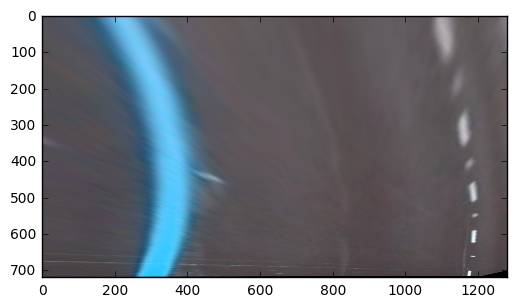

In [73]:
h, w, = im.shape[:2]
M = cv2.getPerspectiveTransform(src, dst)
Minv = cv2.getPerspectiveTransform(dst, src)
warped = cv2.warpPerspective(im, M, (w, h), flags=cv2.INTER_LINEAR)
plt.imshow(warped)

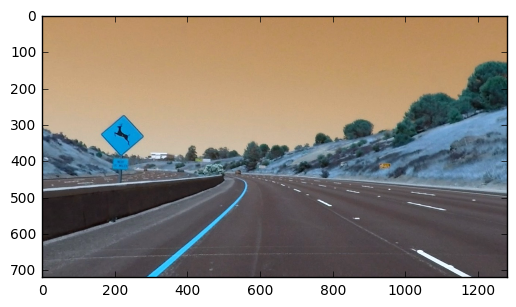

In [74]:
plt.imshow(im)


In [78]:
# Define conversions in x and y from pixels space to meters
ym_per_pix = 30./720. # meters per pixel in y dimension
xm_per_pix = 3.7/700. # meteres per pixel in x dimension
h, w = im.shape[:2]
print(h, w)

720 1280


432


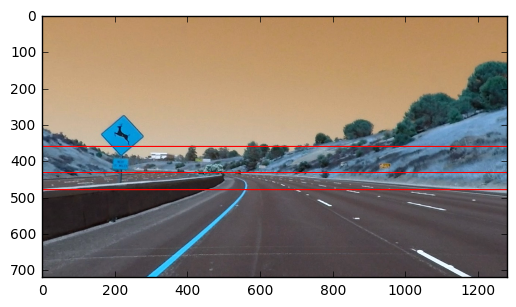

In [92]:
d = int(h - (10/ym_per_pix))
print(d)
cv2.line(im, (0, d), (w, d), [255, 0, 0], 2)
plt.imshow(im)

In [115]:
laneWidthMeters = 3.7
# laneWidthMeters = 4
laneWidthPixels = int(laneWidthMeters/xm_per_pix)
print(laneWidthPixels)

700


In [158]:
D = int(10.0/ym_per_pix)
R = int(13.0/ym_per_pix)
delta = int(1/xm_per_pix)
print(D, R, delta)
# print(int(D/ym_per_pix), int(R/ym_per_pix), int(delta/xm_per_pix))

240 312 189


In [159]:
print("h: {}, w: {}, laneWidthPixels: {}, D: {}, R: {}, delta: {}".format(h, w, laneWidthPixels, D, R, delta))

h: 720, w: 1280, laneWidthPixels: 700, D: 240, R: 312, delta: 189


In [160]:
a = [w/2 - laneWidthPixels/2 - 1.5*delta, h]
b = [w/2 + laneWidthPixels/2 + 1.5*delta, h]
d = [w/2, h - D]
r = [w/2, h - R]
# print(a, b, d, r)
# plt.imshow(im)
# c = ['r', 'g', 'b', 'y']
# i = 0
# for p in [a, b, d, r]:
#     plt.plot(p[0], p[1], '.', color=c[i])
#     i+=1

In [161]:
# mLeft, bLeft = np.polyfit([a[0], r[0]], [a[1], r[1]], 1)
# print(mLeft, bLeft)
# mRight, bRight = np.polyfit([b[0], r[0]], [b[1], r[1]], 1)
# print(mRight, bRight)

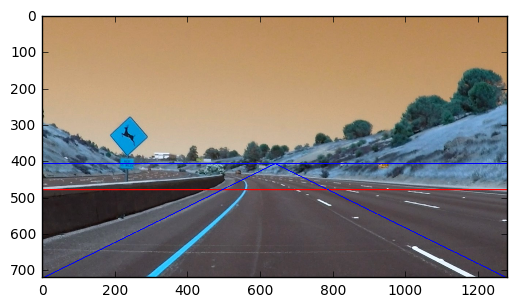

In [162]:
cp = np.copy(img.imageForStage('original'))
cv2.line(cp, (0, int(h - D)), (w, int(h - D)), [255, 0, 0], 2)
cv2.line(cp, (0, int(h - R)), (w, int(h - R)), [0, 0, 255], 2)
cv2.line(cp, (int(a[0]), int(a[1])), (int(r[0]), int(r[1])), [0, 0, 255], 2)
cv2.line(cp, (int(b[0]), int(b[1])), (int(r[0]), int(r[1])), [0, 0, 255], 2)
plt.imshow(cp)

(720, 1280, 3)
h: 720, w: 1280, laneWidthPixels: 700, D: 264, R: 336, delta: 189
top_left: [504.24999999999966, 456], top_right: [775.75000000000023, 456], bottom_right: [1273.5, 720], bottom_left: [6.5, 720]


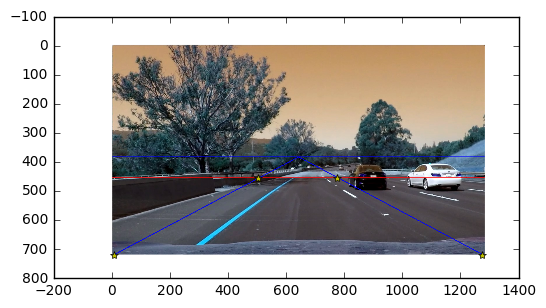

In [218]:
fname = './test_images/test6.jpg'
tmp = cv2.imread(fname)
cp = np.copy(tmp)
print(cp.shape)

ym_per_pix = 30./720. # meters per pixel in y dimension
xm_per_pix = 3.7/700. # meteres per pixel in x dimension
h, w = cp.shape[:2]

laneWidthMeters = 3.7
laneWidthPixels = int(laneWidthMeters/xm_per_pix)
# print(laneWidthPixels)

D = int(11.0/ym_per_pix)
R = int(14.0/ym_per_pix)
delta = int(1/xm_per_pix)
print("h: {}, w: {}, laneWidthPixels: {}, D: {}, R: {}, delta: {}".format(h, w, laneWidthPixels, D, R, delta))

a = [w/2 - laneWidthPixels/2 - 1.5*delta, h]
b = [w/2 + laneWidthPixels/2 + 1.5*delta, h]
d = [w/2, h - D]
r = [w/2, h - R]

cv2.line(cp, (0, int(h - D)), (w, int(h - D)), [255, 0, 0], 2)
cv2.line(cp, (0, int(h - R)), (w, int(h - R)), [0, 0, 255], 2)
cv2.line(cp, (int(a[0]), int(a[1])), (int(r[0]), int(r[1])), [0, 0, 255], 2)
cv2.line(cp, (int(b[0]), int(b[1])), (int(r[0]), int(r[1])), [0, 0, 255], 2)
plt.imshow(cp)

mLeft, bLeft = np.polyfit([a[0], r[0]], [a[1], r[1]], 1)
# print(mLeft, bLeft)
mRight, bRight = np.polyfit([b[0], r[0]], [b[1], r[1]], 1)
# print(mRight, bRight)

top_left = [(h-D-bLeft)/mLeft, h-D]
top_right = [(h-D-bRight)/mRight, h-D]
bottom_right = b
bottom_left = a
print("top_left: {}, top_right: {}, bottom_right: {}, bottom_left: {}".format(
        top_left, top_right, bottom_right, bottom_left))
trapezoid = [top_left, top_right, bottom_right, bottom_left]
for p in trapezoid:
    plt.plot(p[0], p[1], '*', color='y')


In [188]:
print("a: {}, b: {}, d: {}, r: {}".format(a, b, d, r))

a: [6.5, 720], b: [1273.5, 720], d: [640.0, 456], r: [640.0, 384]


# finding interection of lines: [link](http://infohost.nmt.edu/tcc/contrib.html/lang/python/examples/homcoord/Line-intersect.html)

In [217]:
# line1: vertical line y = int(h-D)
# line2: left line: between points: a and r
mHorizontal = 0
bHorizontal = h - D
mLeft, bLeft = np.polyfit([a[0], r[0]], [a[1], r[1]], 1)
print(mLeft, bLeft)
mRight, bRight = np.polyfit([b[0], r[0]], [b[1], r[1]], 1)
print(mRight, bRight)

# a = num.array ( ( (self.a, self.b), (other.a, other.b) ) )
#         b = num.array ( (-self.c, -other.c) )
#         x, y = num.linalg.solve(a,b)

p1 = np.array([[mLeft, mHorizontal], [-1, -1]])
p2 = np.array([-bLeft, -bHorizontal])
x, y = np.linalg.solve(p1, p2)
print("x: {}, y: {}".format(x, y))

p1 = [(h-D-bLeft)/mLeft, h-D]
p2 = [(h-D-bRight)/mRight, h-D]
print("p1: {}, p2: {}".format(p1, p2))

print(x, y)

-0.530386740331 723.447513812
0.530386740331 44.5524861878
x: 1363.9999999999998, y: -907.9999999999998
p1: [504.24999999999966, 456], p2: [775.75000000000023, 456]
1364.0 -908.0


a: [6.5, 720], b: [1273.5, 720], r: [640.0, 384]
m_left: -0.5303867403314917, b_left: 723.4475138121545
m_right: 0.5303867403314912, b_right: 44.55248618784554
p1: [504.24999999999966, 456], p2: [775.75000000000023, 456]


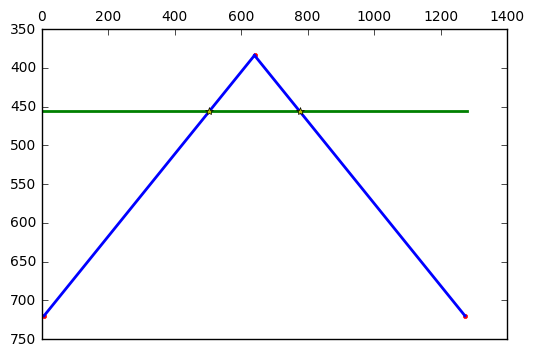

In [216]:
# plt.gca().invert_yaxis()
ax=plt.gca()                            # get the axis
ax.invert_yaxis()
# ax.set_ylim(ax.get_ylim()[::-1])        # invert the axis
ax.xaxis.tick_top()                     # and move the X-Axis      
# ax.yaxis.set_ticks(np.arange(0, 16, 1)) # set y-ticks
# ax.yaxis.tick_left()    
print("a: {}, b: {}, r: {}".format(a, b, r))
plt.plot(a[0], a[1], '.', color='r')
plt.plot(b[0], b[1], '.', color='r')
plt.plot(r[0], r[1], '.', color='r')
plt.plot([a[0], r[0]], [a[1], r[1]], color='b', linewidth=2)
plt.plot([b[0], r[0]], [b[1], r[1]], color='b', linewidth=2)
plt.plot([0, 1280], [h-D, h-D], color='g', linewidth=2)

# lines = plt.plot(a[0], r[0], a[1], r[1])
# print("lines: {}".format(lines))
# plt.setp(lines, color='b', linewidth=2.0)

m_left, b_left = np.polyfit([a[0], r[0]], [a[1], r[1]], 1)
print("m_left: {}, b_left: {}".format(m_left, b_left))


m_right, b_right = np.polyfit([b[0], r[0]], [b[1], r[1]], 1)
print("m_right: {}, b_right: {}".format(m_right, b_right))

p1 = [(h-D-b_left)/m_left, h-D]
p2 = [(h-D-b_right)/m_right, h-D]
print("p1: {}, p2: {}".format(p1, p2))
plt.plot(p1[0], p1[1], '*', color='y')
plt.plot(p2[0], p2[1], '*', color='y')


p1: [504.24999999999966, 456], p2: [775.75000000000023, 456]


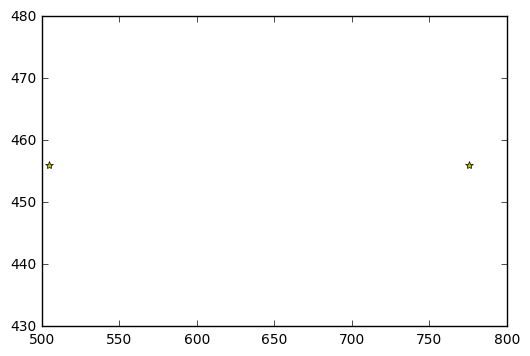